<h1>Analyzing the dataset we created to extract relevant information

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../mitbih_beats.csv')
data.head()

,samp_0,samp_1,samp_2,samp_3,samp_4,samp_5,samp_6,samp_7,samp_8,samp_9,...,samp_83,samp_84,samp_85,samp_86,samp_87,samp_88,samp_89,samp_90,rr_interval,label
0,-0.145,-0.155,-0.185,-0.210,-0.245,-0.270,-0.285,-0.275,-0.265,-0.245,...,-0.220,-0.180,-0.180,-0.175,-0.185,-0.195,-0.220,-0.230,1152.777778,R
1,-0.150,-0.150,-0.130,-0.125,-0.120,-0.115,-0.120,-0.130,-0.140,-0.155,...,-0.150,-0.150,-0.155,-0.145,-0.165,-0.150,-0.135,-0.125,683.333333,A
2,-0.160,-0.180,-0.180,-0.165,-0.155,-0.145,-0.135,-0.120,-0.120,-0.125,...,-0.280,-0.280,-0.265,-0.230,-0.200,-0.170,-0.140,-0.125,730.555556,A
3,-0.280,-0.325,-0.345,-0.345,-0.325,-0.300,-0.270,-0.240,-0.225,-0.205,...,-0.215,-0.195,-0.205,-0.215,-0.250,-0.280,-0.295,-0.290,1830.555556,R
4,-0.180,-0.170,-0.170,-0.165,-0.145,-0.145,-0.170,-0.210,-0.220,-0.215,...,-0.145,-0.165,-0.185,-0.200,-0.210,-0.195,-0.205,-0.205,677.777778,A


In [ ]:
len(data) # number of individual beats

109489

### We can clearly see a disproportianate amount of (N)ormal beats in the dataset which is not good for training
_We will need to appropriately preprocess the data._

In [ ]:
data['label'].value_counts(normalize=True) * 100 # Percentage of each label's occurance in the dataset

label
N    68.542959
L     7.375170
R     6.629890
V     6.512070
/     6.418910
A     2.325348
f     0.896894
F     0.733407
j     0.209153
a     0.137000
E     0.096813
J     0.075807
Q     0.030140
e     0.014613
S     0.001827
Name: proportion, dtype: float64

### The signal's original form is maintained in the dataset

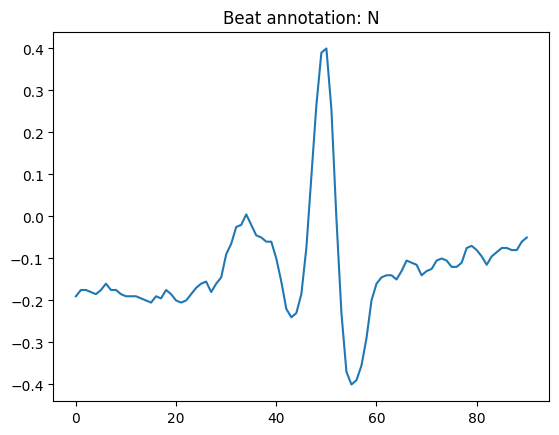

In [53]:
sample_row = data.iloc[3002].to_list()
sample_beat = sample_row[:-2] # Last 2 elements are the R-R interval and label respectively
beat_annotation = sample_row[-1]

plt.title(f'Beat annotation: {beat_annotation}')
plt.plot(sample_beat)

### A look at the R-R intervals

In [ ]:
# Lines up with average R-R intervals from medical sources (600-1200 milliseconds)
# https://emedicine.medscape.com/article/2172196-overview?form=fpf

data['rr_interval'].mean()

np.float64(779.3589361082443)

In [ ]:
data['rr_interval'].max() # Almost 6 seconds straight with no beats in an instance!

np.float64(5872.222222222222)